
# <div align=center> This notebooks hopes to analyze data available on kaggle </div> 

### This study hopes to achieves the following 

<ul>
  <li>Statistical Analysis</li>
  <li>Machine Learning</li>
  <li>Model compression</li>
</ul>

### Data used

<ul>
  <li> https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset</li>
</ul>

#### Luis E. Fernandez

In [ ]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from collections import Counter
from itertools import permutations
from scipy import stats as sp
from copy import deepcopy
from numpy.typing import ArrayLike
import matplotlib.colors as mcolors

In [56]:
data_path = pathlib.Path("Datasets/student_info.csv")
data = pd.read_csv(data_path)

data.head(3)

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail


# Data exploration
## Let's see how diverse each column is 

### Analyzing how distributed the qualitative columns are

In [ ]:
#start from the third column since the first two are identifiers 

#TODO: remove first two columns before analyzing data (unique identifier columns)
qualitative = ['gender','age','grade_level','parent_education','internet_access', 'lunch_type', 'extra_activities','final_result']
quantitative = ['math_score', 'reading_score','writing_score', 'attendance_rate','study_hours']

for column in data[qualitative]:
    data_counter = Counter(data[column])

    unique_values = sorted(data_counter.keys())
    count_values = [data_counter[key] for key in unique_values]

    b = plt.bar(range(len(unique_values)), count_values, tick_label = unique_values, align='center')
    for bar in b:
        # print(bar.__dict__)
        plt.text(bar._x0 + bar._width/2, bar._height+3, bar._height, ha = 'center')
    plt.title(str(column))
    plt.show()


# TODO: THIS

In [ ]:
help(sp.skewnorm.rvs)

# Analyzing metrics

<ul>
  <li>Samples</li>
  <li>Minimum</li>
  <li>Maximum</li>
  <li>Range</li>
  <li>quantiles</li>
  <li>Mean</li>
  <li>Mode</li>
  <li>Median</li>
  <li>Standard Deviation</li>
  <li>Variance</li>
  <li>Skew</li>
  <li>Kurtosis</li>
  <li>Covariance</li>
  <li>Correlation</li>
</ul>

# Samples, Minimum, Maximum, Range

### * Samples represent how many datapoints are in a distribution, list, and/or dataset
### * The minimum is the lowest value in a given distribution, list, and/or dataset.
### * The maximum is the highest value in a given distribution, list, and/or dataset.
### * The range is the highest value minus the lowest value (maximum - minimum), meant to represent how distributed the distribution, list, and/or dataset is

In [ ]:
# For example take the following list:
list_values = np.linspace(1,10,19).tolist()
print(list_values)

print(f"The number of samples for this list is: {len(list_values)}")
print(f"The minimum for this list is: {min(list_values)}")
print(f"The maximum for this list is: {max(list_values)}")
print(f"The range for this list is: {max(list_values) - min(list_values)}")

# Now what would happen if we add a minimum and maximum far from the concentraded values?

list_values.append(-1000)
list_values.append(1000)
list_values = sorted(list_values)

print("\n",list_values)
print(f"The number of samples for this list is: {len(list_values)}")
print(f"The minimum for this list is: {min(list_values)}")
print(f"The maximum for this list is: {max(list_values)}")
print(f"The range for this list is: {max(list_values) - min(list_values)}")


## Conclusion 

### As we can see the minimum, maximum and range are pretty simple to calculate and are meant to give us a simple view at how spread out the data is. 
### These values are very susceptible to outliers as we can see above. 

# Median, quantiles, mode, mean


### Median: the middle value in a distribution, list, and/or dataset
### Quantile: the 25th, 50th (median), and 75th percent quantiles 
### Mode: the most frequent value
### Mean: 
* Arithmetic mean: the sum of all values divided by the number of samples
* Geometric mean:
* harmonic mean: 

In [ ]:
# Using the same list as before we calculate the median and quantiles
# To calculate the median we need to sort the list in ascending order before calculating it. 

# list_values = [1,2,3]

# list_values.append(0)
list_values = sorted(list_values)
print(list_values)

if len(list_values)%2 == 0:
    print("The middle value is not in the middle")

    middle_value = np.floor((len(list_values)+1)/2)
    print(middle_value, (list_values[int(middle_value)-1] + list_values[int(middle_value)])/2 , np.median(list_values))
else:
    print("The middle value is in the middle")
    middle_value = np.round(len(list_values)/2,0)

    print(middle_value, list_values[int(middle_value)], np.median(list_values))

# we will be using the numpy functions going forward, this was just to demonstrate what happens when we find the median of a list with even amount of samples

# Now we calculate quantiles which is the value at 25th, 50th, 75th percent quantile

print(f"The 25th quantile is {np.quantile(list_values, 0.25)}")
print(f"The 50th quantile is {np.quantile(list_values, 0.50)}, the same as the median")
print(f"The 75th quantile is {np.quantile(list_values, 0.75)}")


# The mode is the most frequent datapoint in a list
print(f"The mode is {sp.mode(list_values).mode} with frequency {sp.mode(list_values).count}")

# The mean (usually the Arithmetic mean) is the sum of all values divided by the number of samples 

print(f"The mean is {sum(list_values)/len(list_values)}, from numpy: {np.mean(list_values)}")

# Standard Deviation, Variance, Skew, Kurtosis

In [103]:
from matplotlib.lines import Line2D

def plot_histogram(data:pd.DataFrame, sample = True, units = "units",list_bins = False):
    for distribution in data:
        uniques = len(set(data[distribution]))
        samples = len(data[distribution])
        fig = plt.figure(figsize=(14,10), facecolor=(0.9,0.9,0.9))
        if data[distribution].dtype != object:
            n,bins,_ = plt.hist(data[distribution],edgecolor = [[0,0,0]], bins='auto' if uniques >20 else uniques,align='mid')
            ax = plt.gca()
            ax.set_facecolor((0.85,0.85,0.85,0.5))
            max_value = data[distribution].max()
            min_value = data[distribution].min()
            max_list_count = max(n)
            mean = data[distribution].mean()
            median = data[distribution].median()
            variance = data[distribution].var(ddof=1 if sample else 0)
            standard_deviation = np.sqrt(variance)
            skew = sp.skew(data[distribution])
            kurtosis = sp.kurtosis(data[distribution])
            if list_bins:
                for i, (height, bin) in enumerate(zip(n,bins)):
                    if height != 0:
                        plt.text((np.round(bin,2)+np.round(bins[i+1],2))/2, 1.05*float(height), f"[{np.round(bin,2)}, {np.round(bins[i+1],2)})", fontsize= 7, horizontalalignment = 'center')
            plt.plot([], [],color='none', label=f"Samples = {samples}")
            plt.plot([], [],color='none', label=f"Uniques = {uniques}")
            plt.vlines(min_value, -0.07*max_list_count,-0.01*max_list_count, ((0.5,1,0.5, 0.5)), label = f"Minimum = {np.round(min_value,2)} {units}")
            plt.vlines(max_value, -0.07*max_list_count,-0.01*max_list_count, ((0.5,1,0.5, 0.5)), label = f"Maximum = {np.round(max_value,2)} {units}")
            plt.hlines(-0.04*max_list_count, min_value, max_value, colors=((0.5,1,0.5, 0.5)), label=f"Range {np.round(max_value - min_value,2)} {units}", linestyles='dashed')
            plt.vlines(mean, 0, max_list_count+0.02*max_list_count, ((1,0,0, 0.3)), label=f"Mean = {np.round(mean,2)} {units}")
            plt.vlines(median, -0.02*max_list_count, max_list_count, ((0,1,0, 0.5)), label=f"Median = {np.round(median,2)} {units}")
            plt.vlines([np.quantile(data[distribution], 0.25), np.quantile(data[distribution], 0.75)], -0.03*max_list_count, max_list_count+0.03*max_list_count, ((0,0,1, 0.5)), 
                    label=f"Quantiles (25th = {np.round(np.quantile(data[distribution], 0.25),2)} {units}, \n75th = {np.round(np.quantile(data[distribution], 0.75),2)} {units})", linestyles='dashed')
            # plt.text(((max_value + min_value)/2), -0.09*max_list_count, "Range", ha='center')
            plt.vlines(mean, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid', label=f"Standard Deviations = {np.round(standard_deviation,2)} {units}")
            plt.text(mean, -0.08*max_list_count, f"0{"σ" if sample else "S"}", fontsize = 7, ha='center')
            i = 1
            while (mean - standard_deviation*i >= min_value) or (mean + standard_deviation*i <= max_value):
                if mean - standard_deviation*i >= min_value:
                    plt.vlines(mean - standard_deviation*i, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid')
                    plt.text(mean - standard_deviation*i, -0.08*max_list_count, f"-{i}{"σ" if sample else "S"}", fontsize = 7, ha='center')
                if mean + standard_deviation*i <= max_value:
                    plt.vlines(mean + standard_deviation*i, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid')
                    plt.text(mean + standard_deviation*i, -0.08*max_list_count, f"{i}{"σ" if sample else "S"}", fontsize = 7, ha='center')
                i+=1

            # Create a dummy legend entry that looks like plain text
            plt.plot([], [],color='none', label=f"Variance = {np.round(variance,2)} {units}$^2$")
            plt.plot([], [],color='none', label=f"Skew = {np.round(skew,2)} {units}$^3$")
            plt.plot([], [],color='none', label=f"Kurtosis = {np.round(kurtosis,2)} {units}$^4$")
            plt.xticks(np.linspace(np.round(0.8*min_value,0), np.round(1.2*max_value,0), 11))
        else:
            n,bins,_ = plt.hist(data[distribution],edgecolor = [[0,0,0]], bins='auto' if uniques >20 else uniques,align='mid')
            if list_bins:
                for i, (height, bin) in enumerate(zip(n,bins)):
                    if height != 0:
                        plt.text((np.round(bin,2)+np.round(bins[i+1],2))/2, 1.05*float(height), f"{height}", fontsize= 7, horizontalalignment = 'center')
        fig.set_facecolor((0.8,0.8,0.8,0.5))
        plt.title(distribution)
        plt.legend(bbox_to_anchor=(1.3,1))
        # plt.grid(True, 'both','x', color = ((0.01,0.01,0.01,0.1)))
        plt.show()



np.random.seed(42)
samples = 10000
outliers = 100
distributions = pd.DataFrame()


normal_list = np.random.normal(0,3,samples)
skewed_list = np.random.weibull(0.75, samples)
outlier_list = np.random.normal(0,3,samples-outliers)
outlier_list = np.append(outlier_list, np.random.uniform(90,100,outliers))
laplace_list = np.random.laplace(0,1,samples)
uniform_list = np.random.uniform(-10,10,samples)


rows = {
    'Normal Distribution':normal_list,
    'Skewed Distribution (Weibull)':skewed_list,
    'Outlier in Normal Distribution':outlier_list,
    'Laplace Distribution':laplace_list,
    'Uniform Distribution':uniform_list,
}
 
rows = pd.DataFrame(rows)
distributions = pd.concat([distributions, rows])

# plot_histogram(distributions)

# plt.hist(uniform_list, bins='auto', alpha = 0.7,label=f"""uniform variance = {np.round(np.var(uniform_list),2)}
# uniform skew = {np.round(sp.skew(uniform_list),2)}
# uniform kurtosis = {np.round(sp.kurtosis(uniform_list),2)}""")
# plt.hist(normal_list, bins='auto', alpha = 0.7, label=f"""normal variance = {np.round(np.var(normal_list),2)}
# normal skew = {np.round(sp.skew(normal_list),2)}
# normal kurtosis = {np.round(sp.kurtosis(normal_list),2)}""")
# plt.hist(laplace_list,bins = 'auto', alpha = 0.7, label=f"""laplace variance = {np.round(np.var(laplace_list),2)}
# laplace skew = {np.round(sp.skew(laplace_list),2)}
# laplace kurtosis = {np.round(sp.kurtosis(laplace_list),2)}""")
# plt.legend(bbox_to_anchor=(1.5,1))
# plt.show()




In [50]:

mean1 = distributions['Normal Distribution'].mean()
median1=distributions['Normal Distribution'].median()
variance1=distributions['Normal Distribution'].var()
standard_dev1 = distributions['Normal Distribution'].std()
skew1 = distributions['Normal Distribution'].skew()
kurtosis1 = distributions['Normal Distribution'].kurt()

mean2 = np.mean(distributions['Normal Distribution'])
median2= np.median(distributions['Normal Distribution'])
variance2= np.var(distributions['Normal Distribution'])
standard_dev2 = np.std(distributions['Normal Distribution'])
skew2 = sp.skew(distributions['Normal Distribution'])
kurtosis2 = sp.kurtosis(distributions['Normal Distribution'])





pandas_way = [
    variance1,
    standard_dev1,
    skew1,
    kurtosis1]

np_sp_way = [
    variance2,
    standard_dev2,
    skew2,
    kurtosis2]

print(list([np.round(x,5),np.round(y,5)] for x,y in zip(pandas_way, np_sp_way)))

[[np.float64(9.06243), np.float64(9.06152)], [np.float64(3.01039), np.float64(3.01024)], [np.float64(0.00196), np.float64(0.00196)], [np.float64(0.02709), np.float64(0.02648)]]


### Standard Deviation:
### Variance:
### Skew: 
### Kurtosis 

# Covariance and Correlation

## Covariance

### Covariance is:

## Correlation

### Correlation is:

In [ ]:
#Let's generate three datasets:

np.random.seed(42)
samples = 10000
x = np.linspace(-10,10,samples)
dist1 = 2 * x + 2*np.random.randn(samples) # initial dataset
dist2 = -4 * x + 2*np.random.randn(samples) # negative correlation
dist3 = np.random.uniform(-50,200,samples) # No correlation
dist4 = 6 * x + 2*np.random.randn(samples) # Positive correlation
dist5 = 2*x**2 + 2*x + 2*np.random.randn(samples)

# plt.scatter(x, dist3, alpha=0.1, label=f"random")
# plt.scatter(x, dist1, alpha=0.1, label=f"y = 2x + b")
# plt.scatter(x, dist2, alpha=0.1, label=f"y = -4x + b")
# plt.scatter(x, dist4, alpha=0.1, label=f"y = 6x + b")
# plt.scatter(x, dist5, alpha=0.1, label=f"y = 2x$^2$ + 2x + b")

# plt.legend(bbox_to_anchor=(1.5,1))
# plt.show()

# data = pd.DataFrame({
#     'distribution 1': dist1,
#     'distribution 2': dist2,
#     'distribution 3': dist3,
#     'distribution 4': dist4,
#     'distribution 5': dist5,
# })

# cov = data.cov()

# corr = data.corr()

# plt.clf()

# plt.figure(figsize=(10,8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()

def cov_corr(data:pd.DataFrame):
    assert len(data) >=2, "Need to have at least 2 distributions"

    plt.figure(figsize=(10,8))
    sns.heatmap(data.cov(), annot=True)
    plt.show()
    plt.figure(figsize=(10,8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.show()

data = pd.DataFrame()

distributions = [dist1,dist2,dist3,dist4,dist5] 
for i in range(len(distributions)):
        data[f'Distribution {i+1}'] = distributions[i]

cov_corr(data)

# Functions

In [ ]:
# TODO:
'''Create a function the prints the following:
    * Mean
    * Mode
    * Median
    * Standard Deviation
    * Variance 
    * skew
    * kurtosis 
    '''


def statAnalysis( *array : ArrayLike, col_name : str | list | ArrayLike | None = None, sample:bool = True)->str:

    if not col_name:
        col_name = [""] * len(array)
    elif isinstance(col_name,str):
        col_name = [col_name]
    assert (len(array) == len(col_name)), "array and col_names length don't match"

    stats_string = ""
    for i, (data, name) in enumerate(zip(array,col_name), start=1):

        stats_string += f"\n{i}. {name}\n"
        samples = len(data)
        min = np.min(data)
        max = np.max(data)
        data_range = max - min
        mean = np.mean(data)
        mode = sp.mode(data)
        median = np.median(data)
        standard_dev = np.std(data, ddof=1) if sample else np.std(data)
        variance = standard_dev**2
        skew = sp.skew(data)
        kurtosis = sp.kurtosis(data)

        stats_string += f"""
        samples: {samples}
        min: {min}
        max: {max}
        range: {data_range}
        mode: {mode.mode} - frequency: {mode.count}
        mean: {mean}
        median: {median}
        standard deviation: {np.round(standard_dev,5)}
        variance: {np.round(variance,5)}
        skew: {skew}
        kurtosis: {kurtosis}"""



    return stats_string


def cov_corr_analysis( *array : list | ArrayLike, col_name = None)->str:

    if not col_name:
        col_name = [""] * len(array)
    elif isinstance(col_name,str):
        col_name = [col_name]
    assert (len(array) == len(col_name)), "array and col_names length don't match"

    lengths = [len(arr) for arr in array]
    if len(set(lengths)) == 1 and len(lengths) != 1:
        
        covariance = np.cov(array)

        stats_string = f"Covariance\n {covariance}"

        correlation = np.corrcoef(array)

        stats_string += f"\nCorrelation\n {correlation}"
    
    return stats_string





a =  [1,2,3,4,5,6,7]
a2 = [2,3,4,5,6,7,8]
a3 = [-1,-2,-3,-4,-5,-6,-7]
b = [1,1,2,3,4,5,6,6]
c = np.round(np.random.uniform(0,12, 10000),4)
d = np.round(np.random.normal(6, 1, 10000),4)
e = np.round(np.array(sp.skewnorm.rvs(7,size=10000, loc = 6, scale=3)),4)
f = deepcopy(e)
f= np.append(f, [10000]*30)
# plt.hist(c)
# plt.show()
# plt.clf()
# plt.hist(d)
# plt.show()
# plt.clf()
# plt.hist(e)
# plt.show()
# plt.clf()
# plt.hist(f)
# plt.show()
# plt.clf()

# print(statAnalysis(a, col_name="test"))
# print(statAnalysis(b))
# print(statAnalysis(c,col_name="uniform"))
# print(statAnalysis(d,col_name="normal"))
# print(statAnalysis(e,col_name="skew-norm"))
# print(statAnalysis(f,col_name="skew-norm-mean-median"))
# print(statAnalysis(a,a2,a3, col_name=["FIRST", "SECOND", "THIRD"]))
print(statAnalysis(a,d,e,f, col_name=["FIRST", "SECOND", "THIRD", "FOURTH"]))

print(cov_corr_analysis(a,a2,a3, col_name=["FIRST", "SECOND", "THIRD"]))



Index(['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score',
       'reading_score', 'writing_score', 'attendance_rate', 'parent_education',
       'study_hours', 'internet_access', 'lunch_type', 'extra_activities',
       'final_result'],
      dtype='object')
object False
object False
object False
int64 True
int64 True
int64 True
int64 True
int64 True
float64 True
object False
float64 True
object False
object False
object False
object False


C:\Users\luise\AppData\Local\Temp\ipykernel_4536\2020878777.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.3,1))


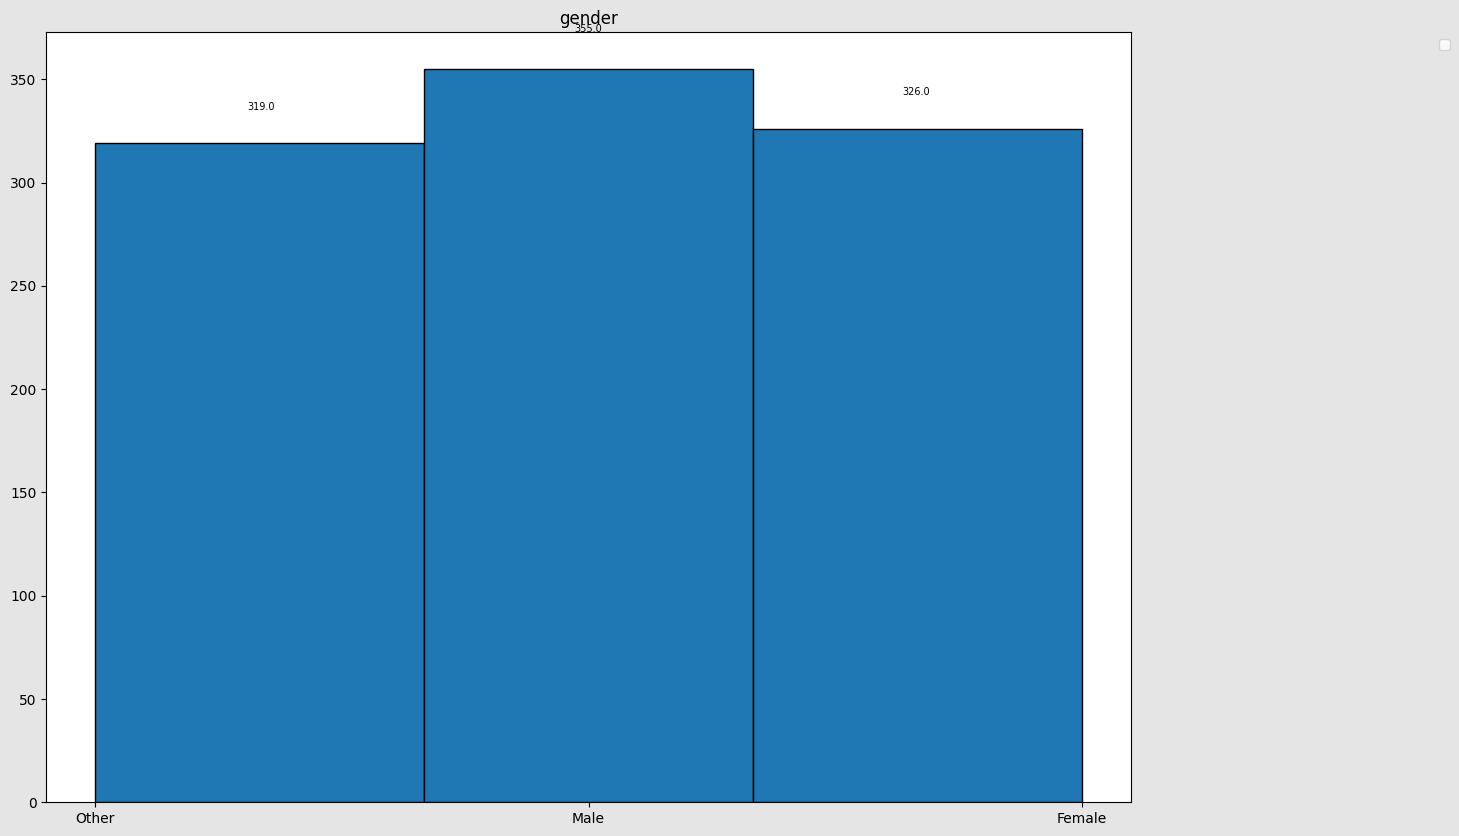

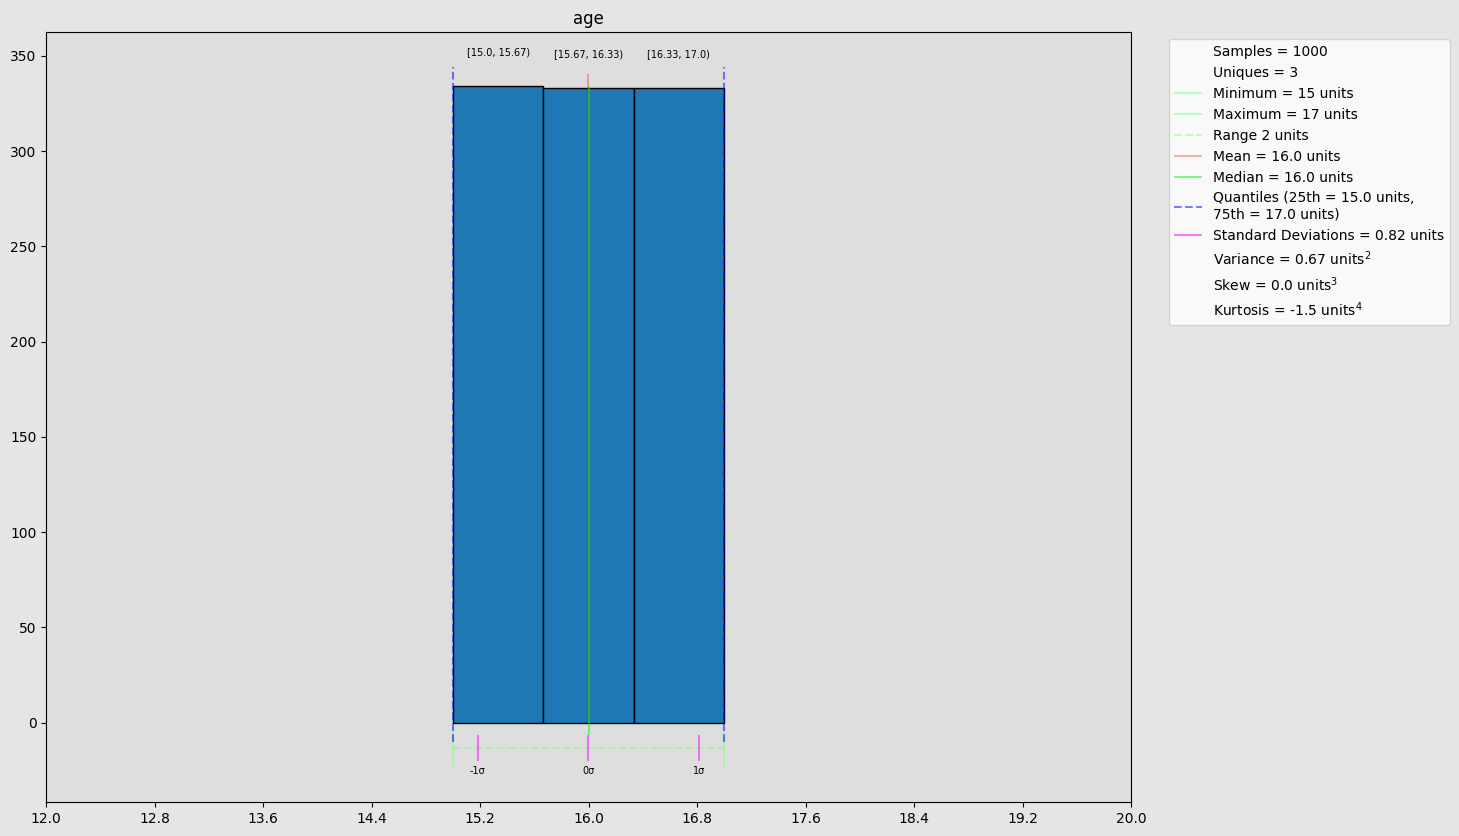

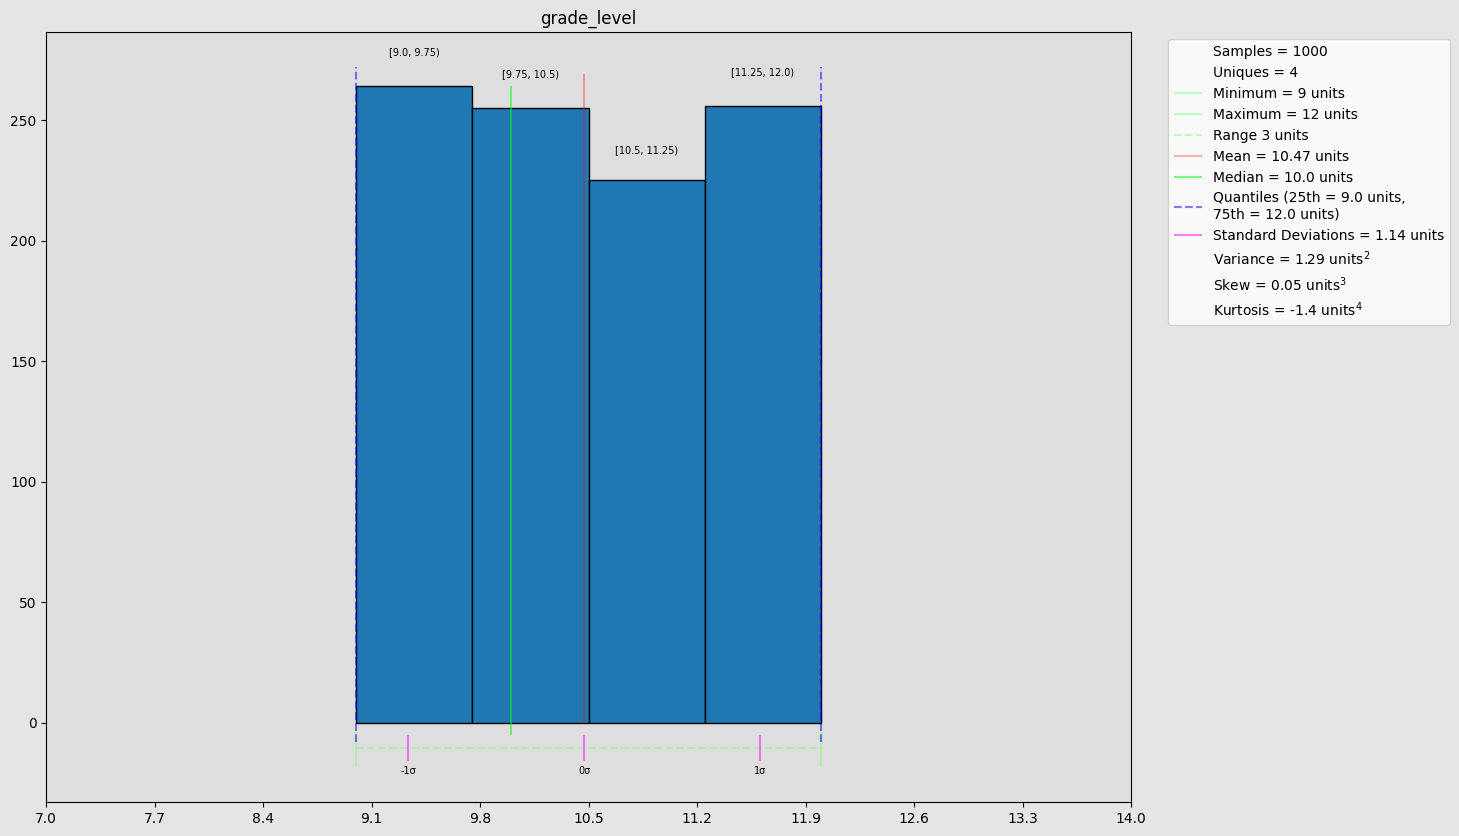

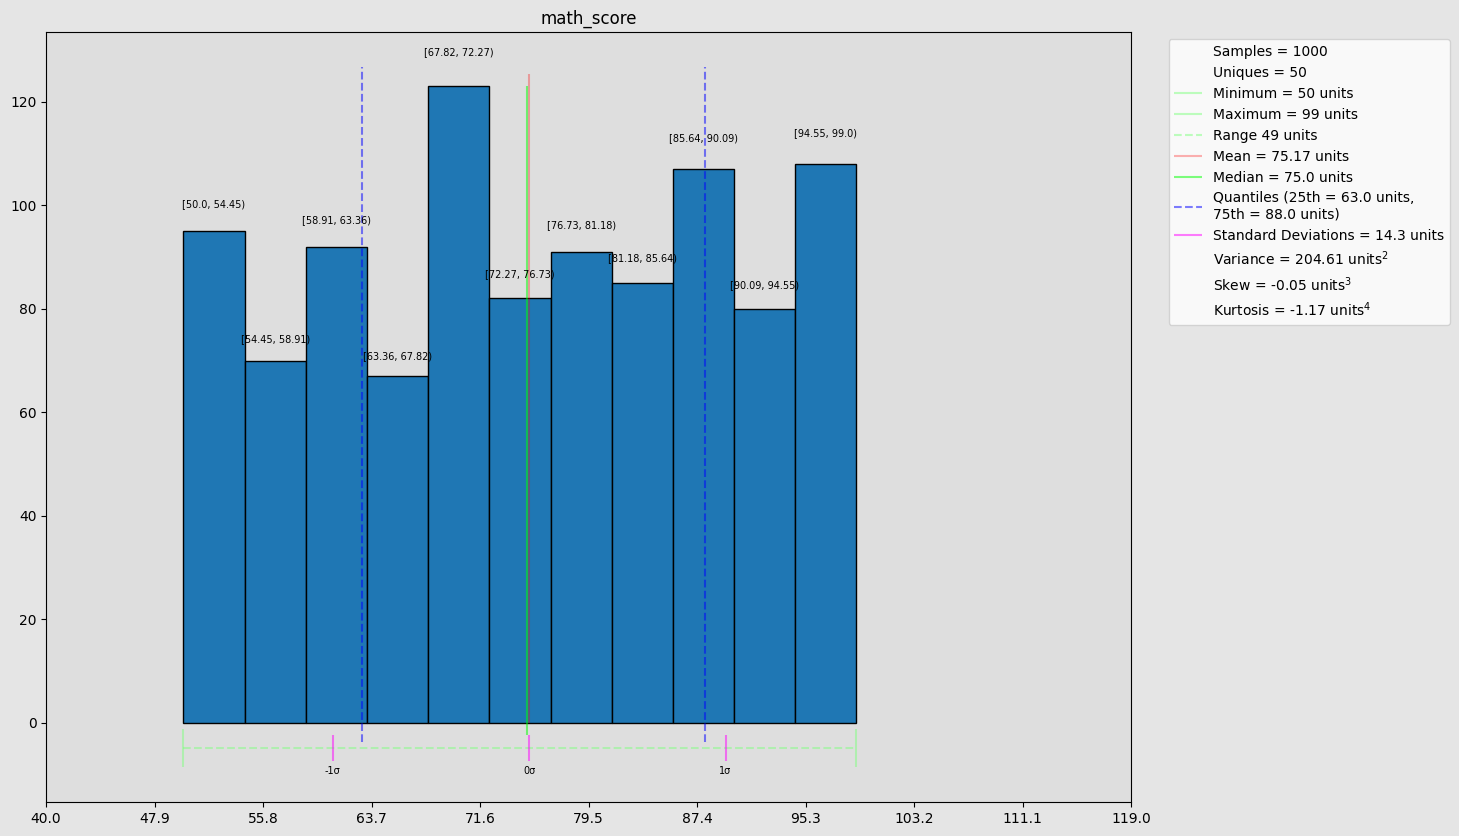

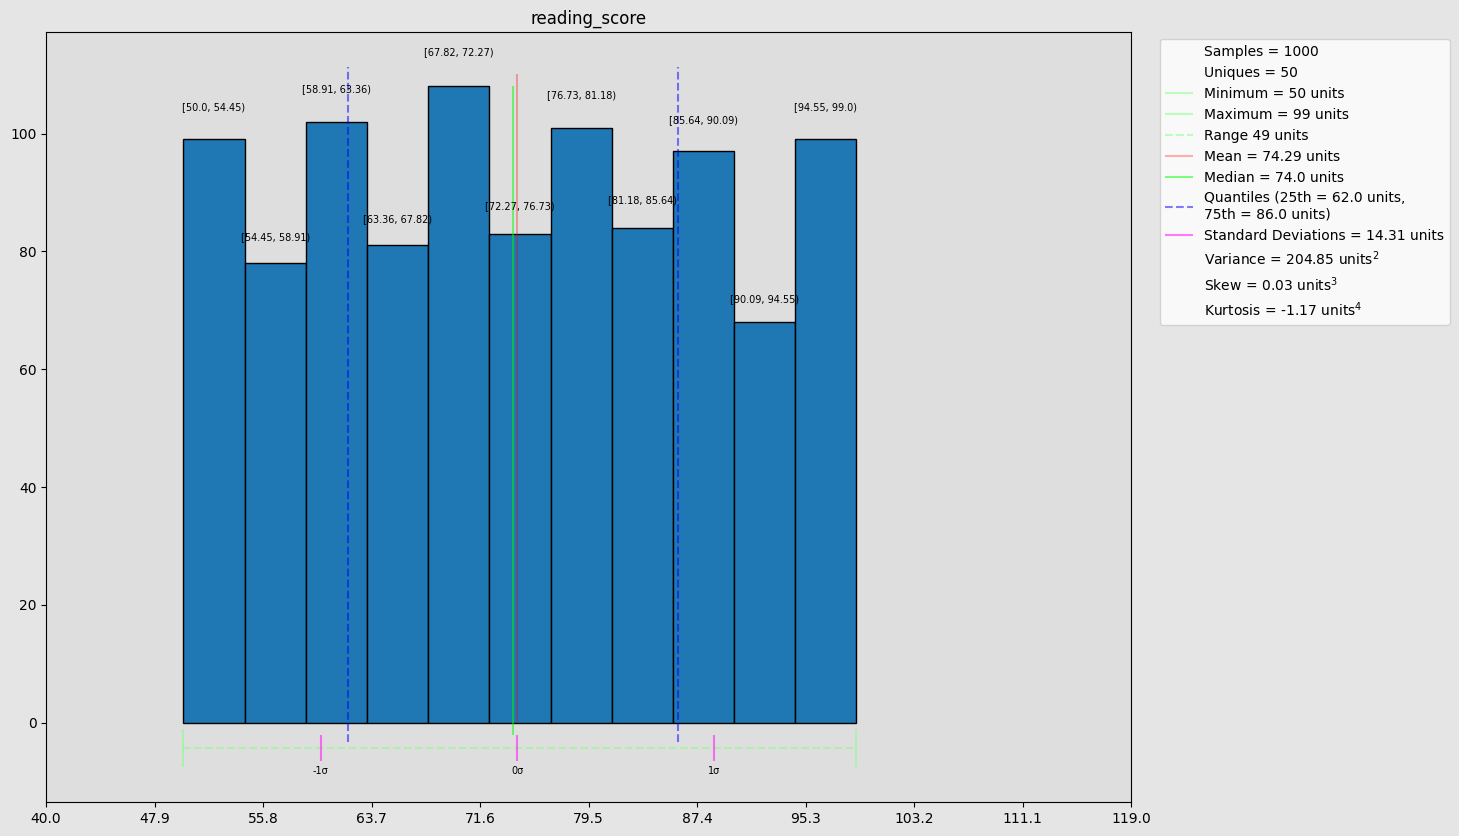

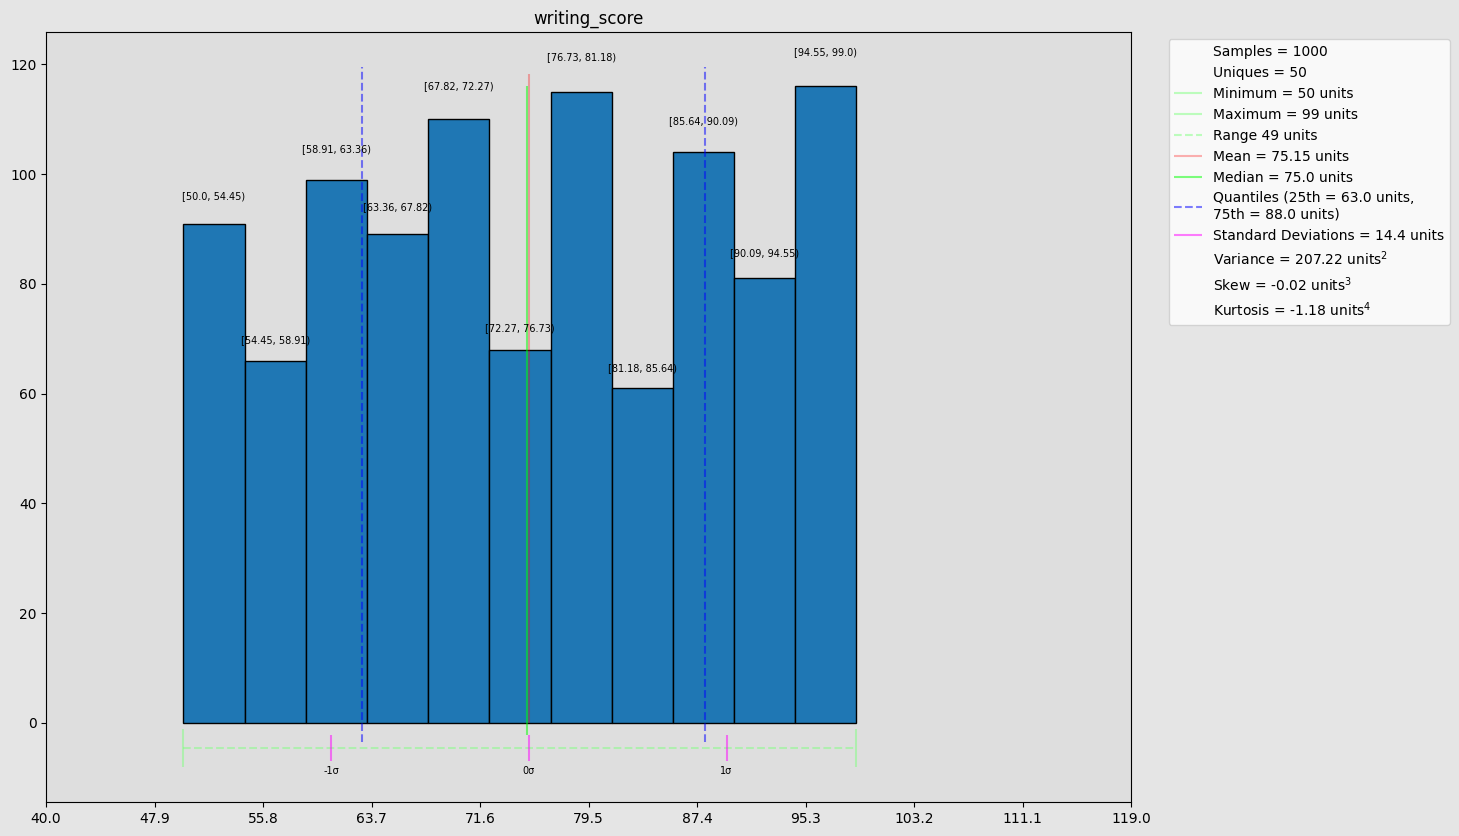

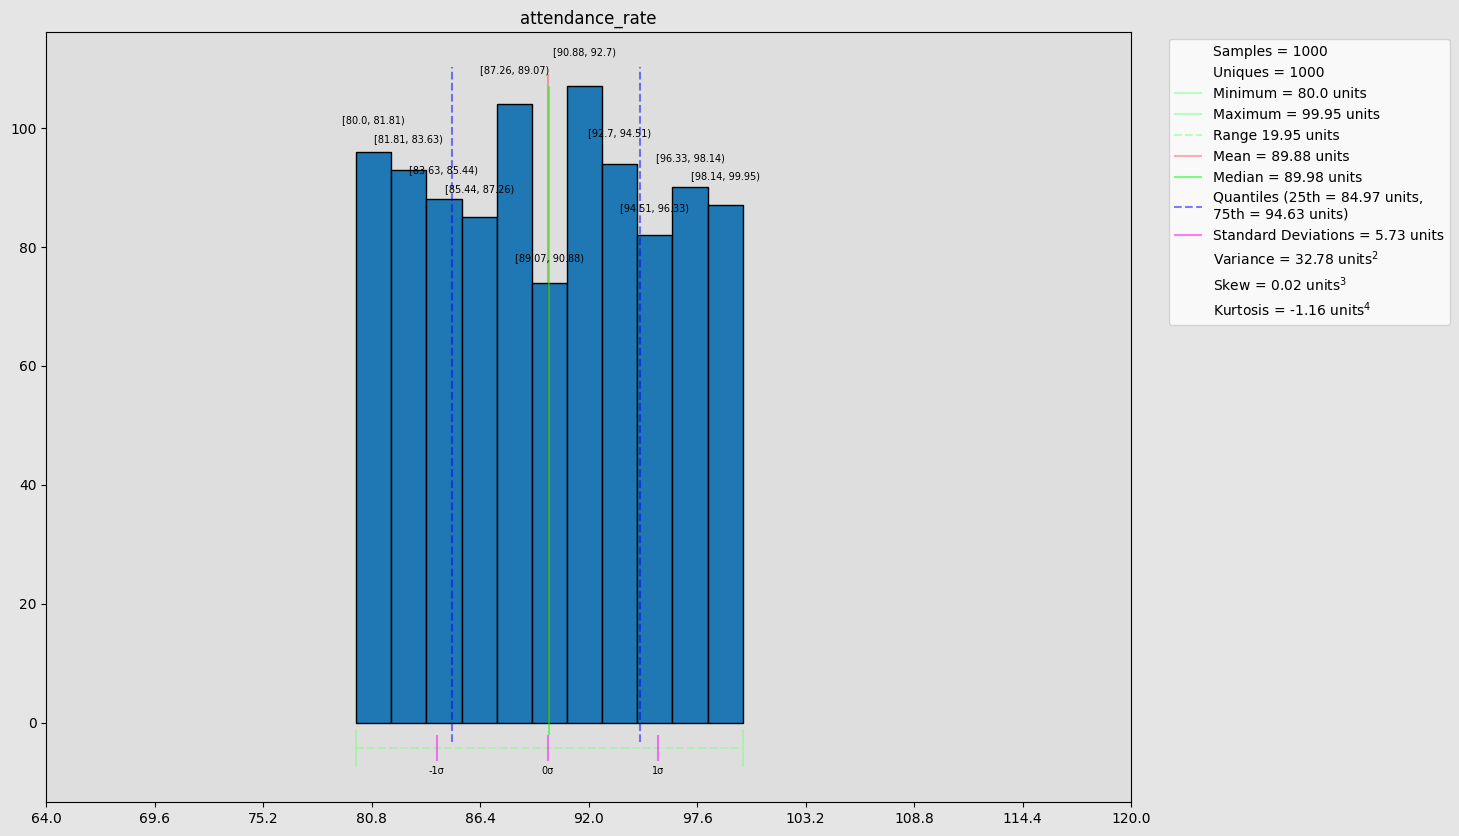

C:\Users\luise\AppData\Local\Temp\ipykernel_4536\2020878777.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.3,1))


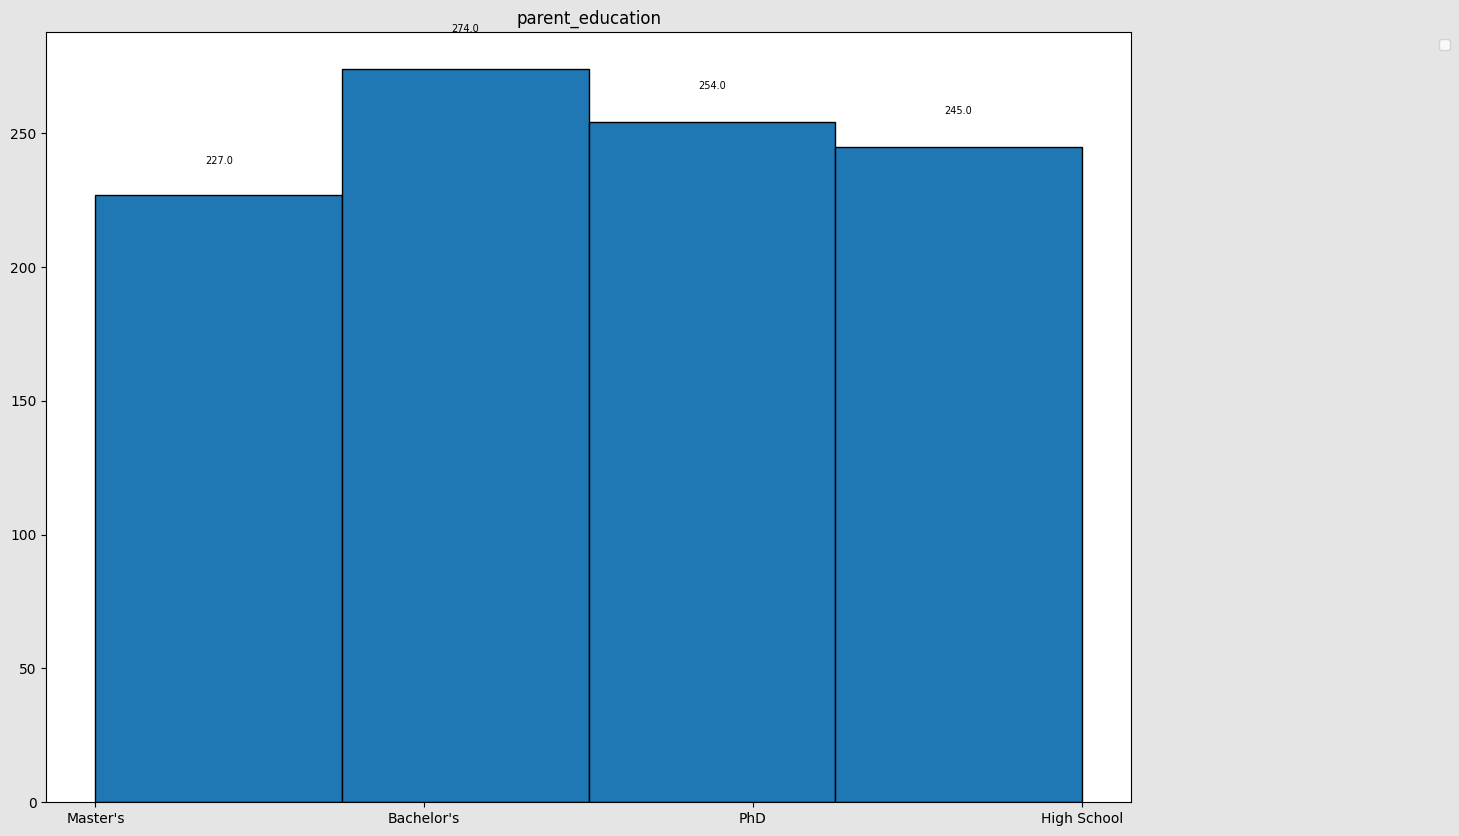

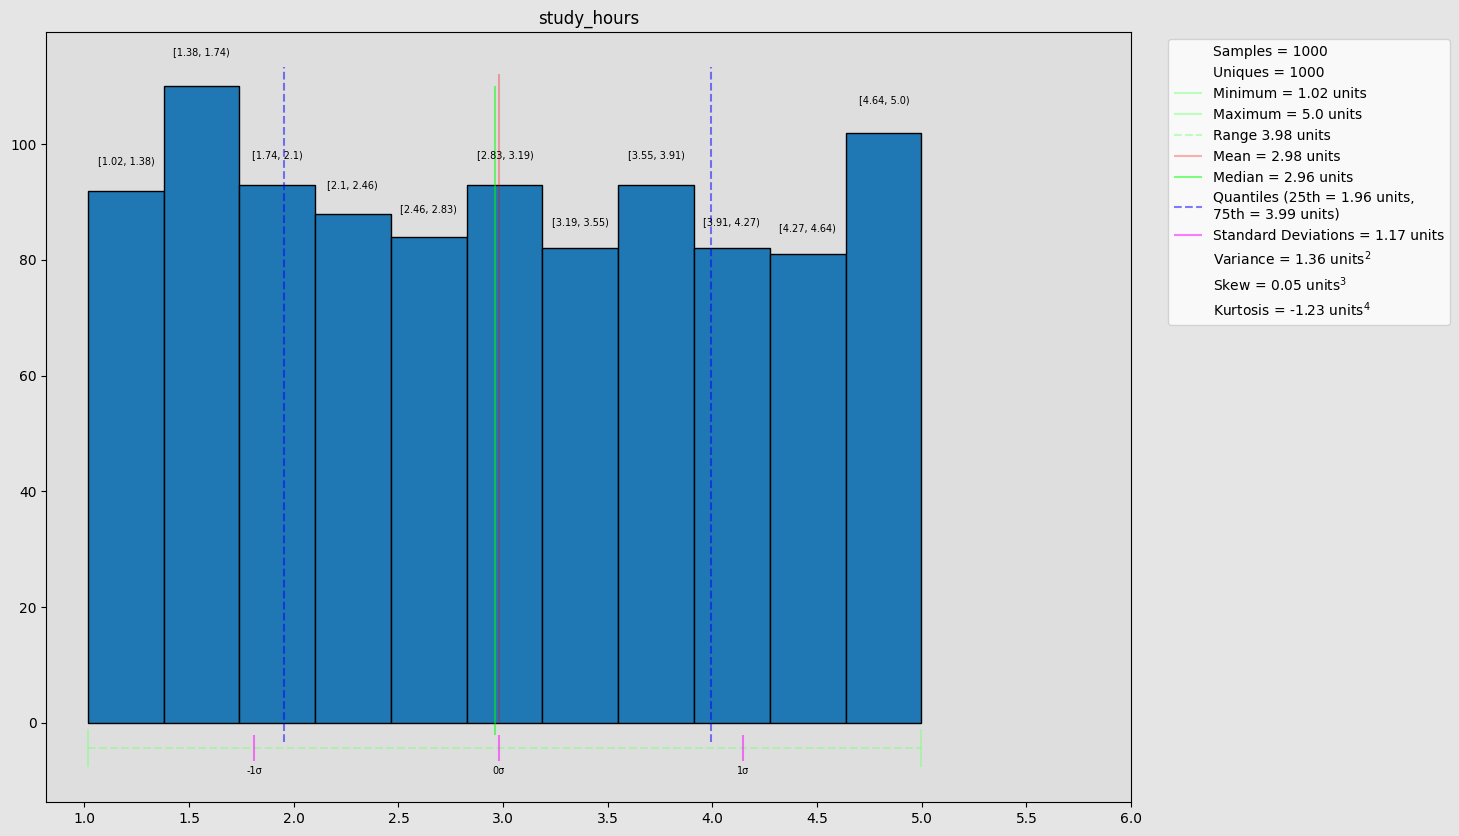

C:\Users\luise\AppData\Local\Temp\ipykernel_4536\2020878777.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.3,1))


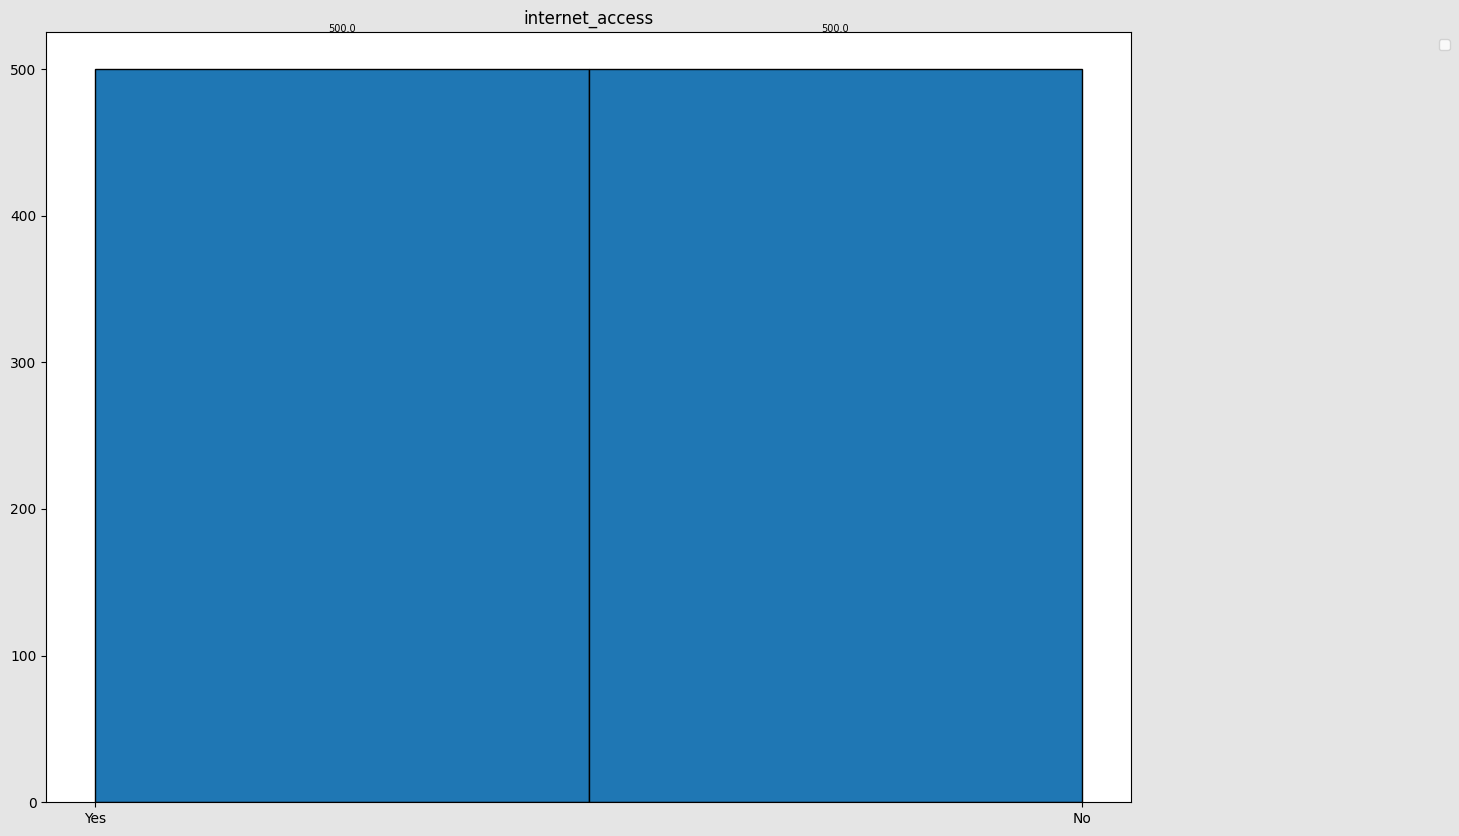

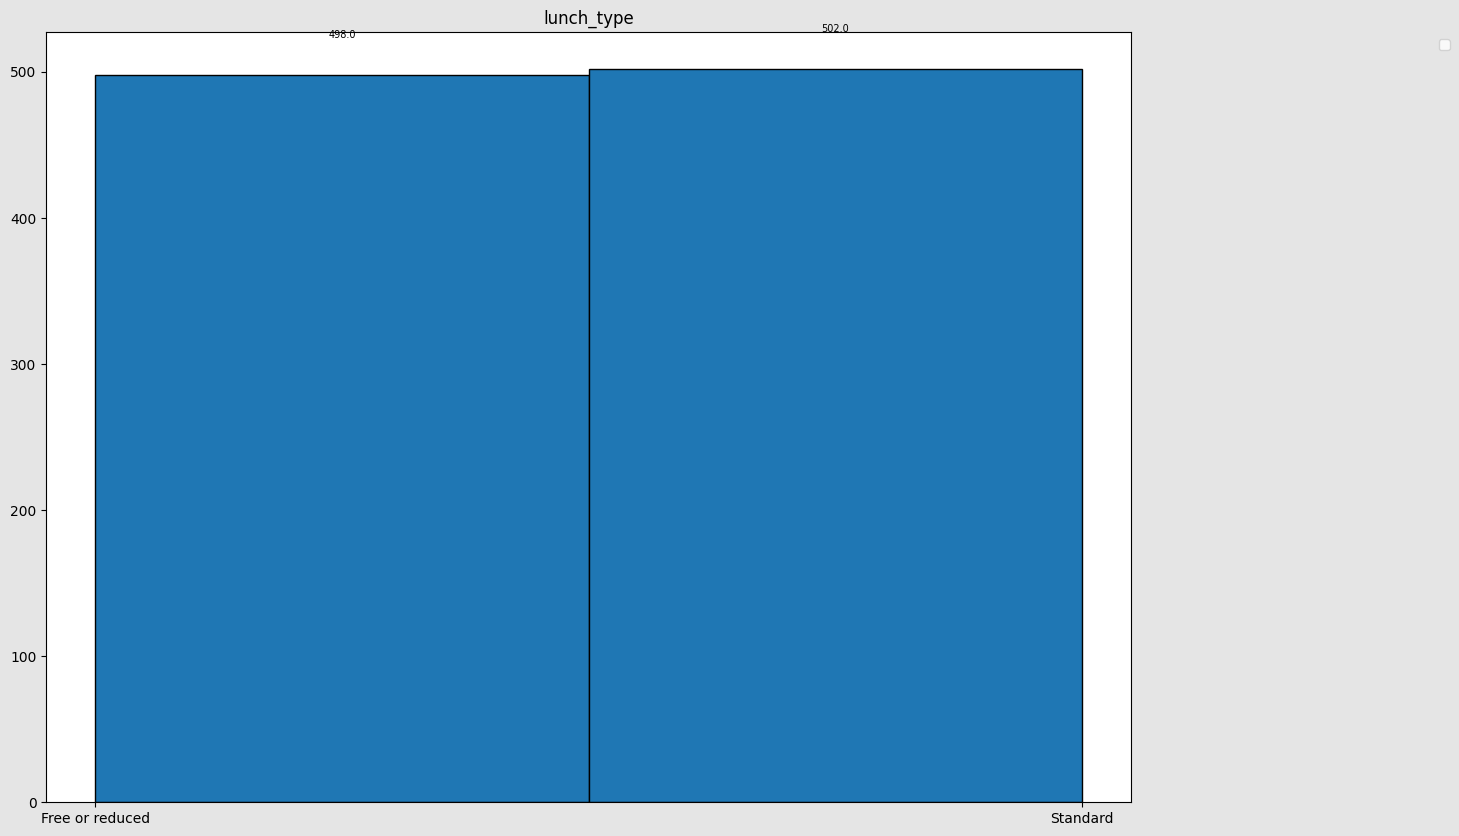

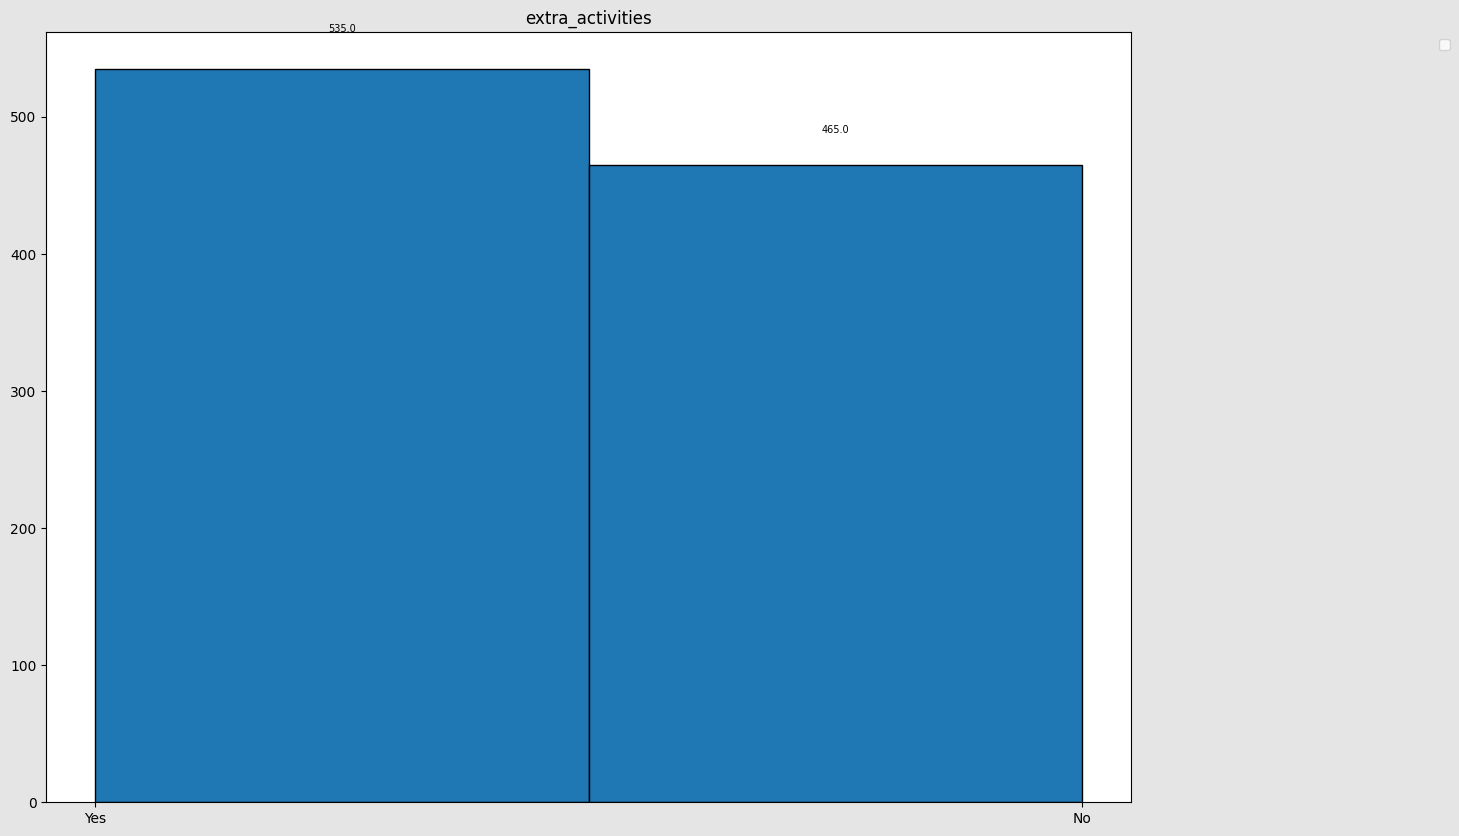

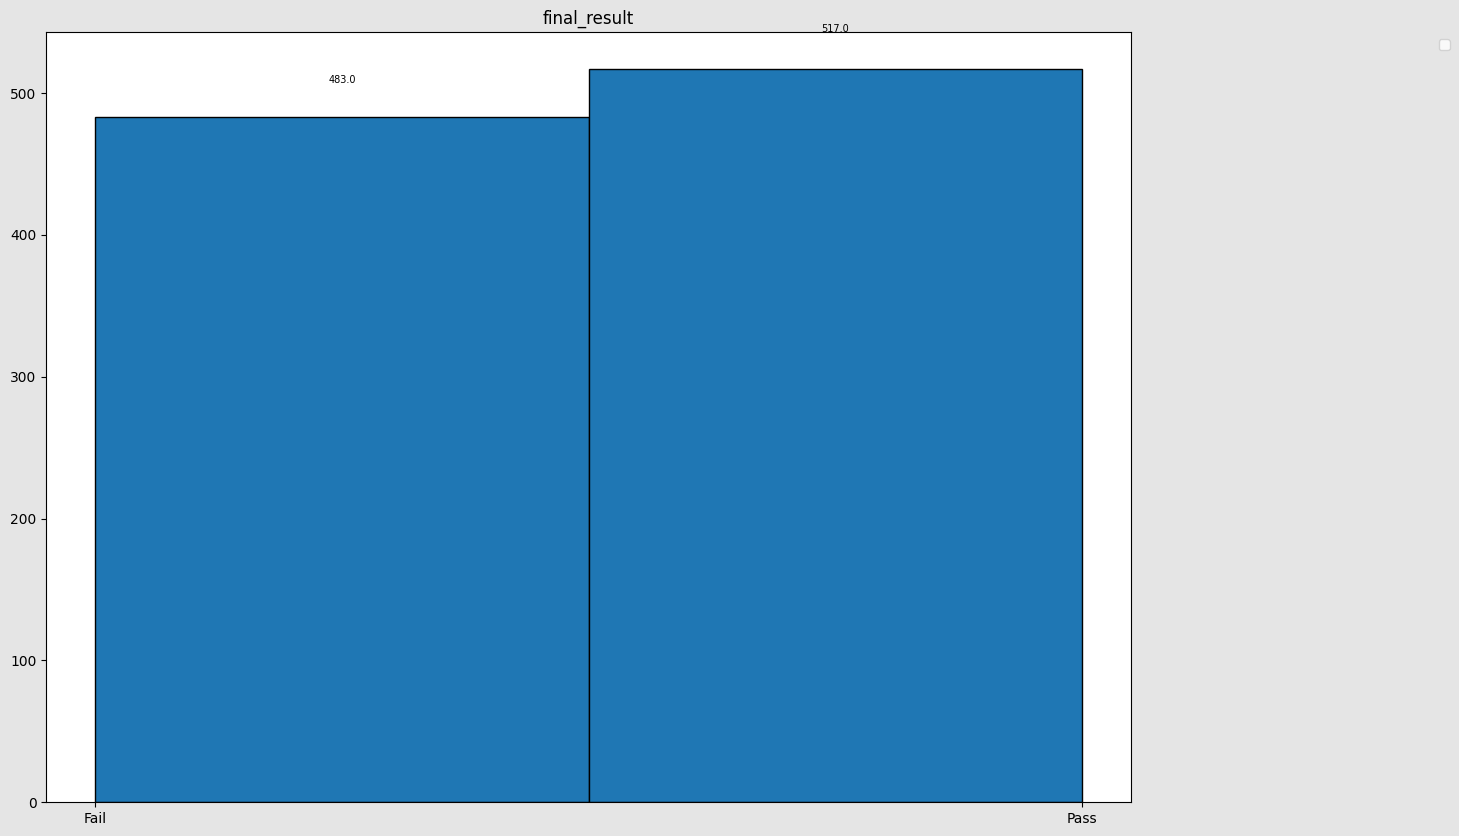

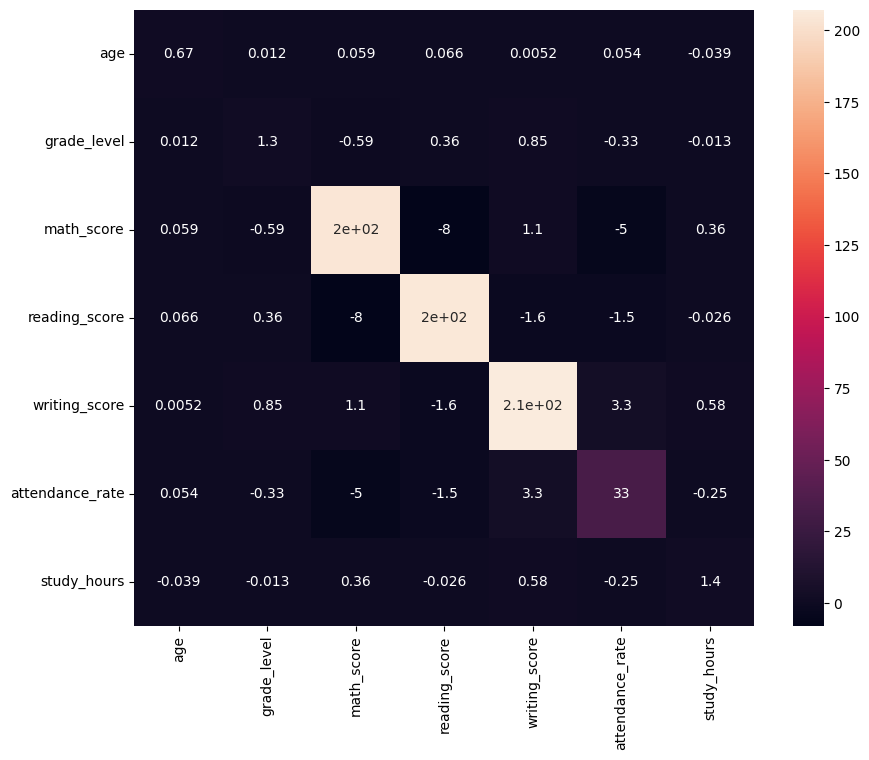

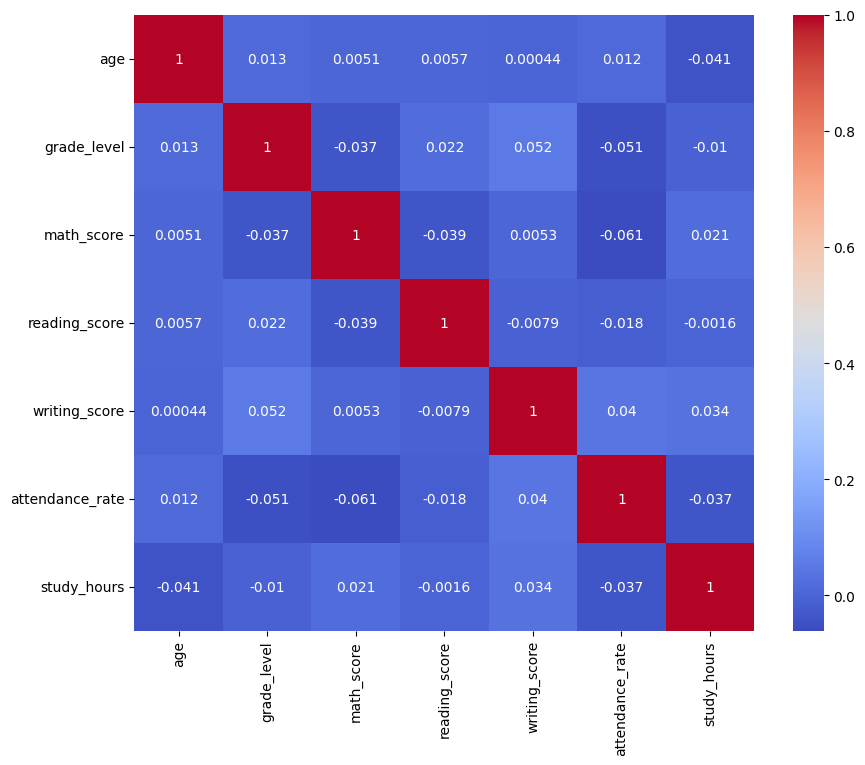

In [105]:
print(data.keys())


quant = ['age', 'grade_level', 'math_score',
       'reading_score', 'writing_score', 'attendance_rate',
       'study_hours']

for x in data:
    print(data[x].dtype, data[x].dtype != object)

plot_histogram(data[data.keys()[2:]], list_bins=True)

cov_corr(data[quant])

# Analyzing quantitative columns

In [ ]:
#TODO: D.A. for quants

for column in data[quantitative]:
    plt.boxplot(data[column], orientation='horizontal', notch=True)
    column_mean = np.mean(data[column])
    column_stdev = np.std(data[column])
    print(f"{column}:\nmean: {column_mean} \nstandard deviation: {column_stdev}")
    plt.title(str(column))
    plt.show()


In [ ]:
for quant in quantitative:
    grouped_data = data.groupby('gender')[quant]
    fig,ax = plt.subplots(len(grouped_data))
    ax[0].set_title(quant)
    for i,gdata in enumerate(grouped_data):
        fig.set_figheight(10)
        ax[i].boxplot([*gdata[1]], orientation='horizontal', tick_labels=[gdata[0]])

    plt.show()
    plt.clf()

    

In [ ]:
def func(var, var2:int|float|None = None, *args, **kwargs):
    """
    test function

    Parameters
    ----------
    var : any 
        initial variable of any type
    var2 : int|float|None
        second variable that can be of numeric type or None
    
    
    """
    print(var)
    print(var2)
    print(args)
    print(kwargs)

func(1,2,3,4, this = 4, that = 5)

In [66]:
print([data.get(key) for key in data.keys()[2:]])

[0       Other
1        Male
2       Other
3       Other
4        Male
        ...  
995    Female
996    Female
997     Other
998     Other
999      Male
Name: gender, Length: 1000, dtype: object, 0      17
1      17
2      17
3      17
4      15
       ..
995    15
996    17
997    16
998    17
999    17
Name: age, Length: 1000, dtype: int64, 0      10
1      12
2       9
3      12
4       9
       ..
995    10
996    12
997    10
998     9
999     9
Name: grade_level, Length: 1000, dtype: int64, 0      74
1      99
2      59
3      70
4      85
       ..
995    76
996    83
997    60
998    94
999    96
Name: math_score, Length: 1000, dtype: int64, 0      61
1      70
2      60
3      88
4      77
       ..
995    75
996    68
997    77
998    66
999    92
Name: reading_score, Length: 1000, dtype: int64, 0      90
1      91
2      99
3      69
4      94
       ..
995    55
996    98
997    92
998    97
999    93
Name: writing_score, Length: 1000, dtype: int64, 0      94.660002
1    